# **Haberman dataset**

**Haberman  Dataset**: Iris Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set)
* 2 types of people who had undergone surgery for breast cancer
* Group 1: survived and Group 2: died
* Each person is defined by 3 features and 1 Class :


1.   Age of patient at time of operation (numerical)
2.   Patient's year of operation (year - 1900, numerical)
3.   Number of positive axillary nodes detected (numerical)
4.   Survival status (class attribute)


**Objective**: Classify a new patient whether he/she would survive given the 3 features.



In [1]:
#importing rewuired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#Loading CSV file
data=pd.read_csv("haberman.csv")

In [3]:
#Fist five rows data
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#Last five rows of data
data.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
# number of points and numer of features
print(data.shape)

(306, 4)


In [6]:
#column names
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
#data-points per class
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation**
1. Class Values are in 1 and 2(Difficult to anlyse)

In [8]:
# Mapping of class names to 1 and 2
data['status']=data['status'].map({1:'survived', 2:'died'})

In [9]:
#data-points per class
data['status'].value_counts()

survived    225
died         81
Name: status, dtype: int64

**Observation**
1. Haberman Data set is not balanced
2. Class Values are approximately in 3:1 ration

In [10]:
data.tail()

,age,year,nodes,status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,died
305,83,58,2,died


# 2-D Scatter Plot

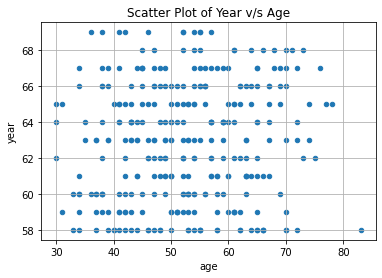

In [11]:
data.plot(kind='scatter', title="Scatter Plot of Year v/s Age", x='age', y='year').grid()
plt.show()

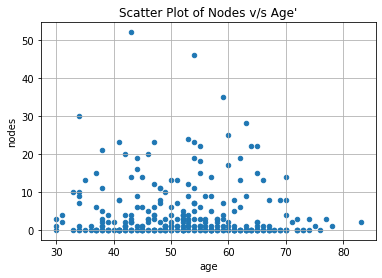

In [12]:
data.plot(kind='scatter', title="Scatter Plot of Nodes v/s Age'", x='age', y='nodes').grid()
plt.show()

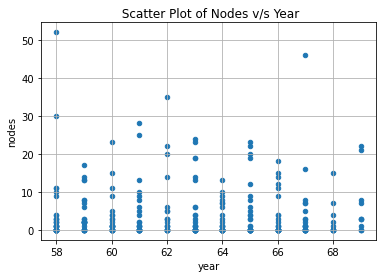

In [13]:
data.plot(kind='scatter', title=" Scatter Plot of Nodes v/s Year", x='year', y='nodes').grid()
plt.show()

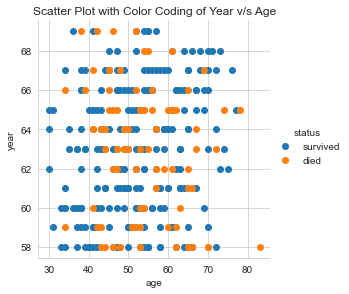

In [14]:
# 2-D Scatter Plot with Color Coding
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", height=4).map(plt.scatter, "age", "year").add_legend().set(title='Scatter Plot with Color Coding of Year v/s Age')
plt.show()

**Observation**
1. Not possible to draw line and separate year and age

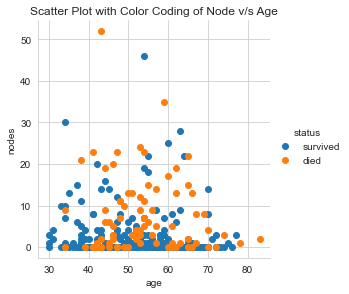

In [15]:
# 2-D Scatter Plot with Color Coding
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", height=4).map(plt.scatter, "age", "nodes") \
            .add_legend().set(title='Scatter Plot with Color Coding of Node v/s Age')
plt.show()

**Observation**

1. Not possible to draw line and separate nodes and age

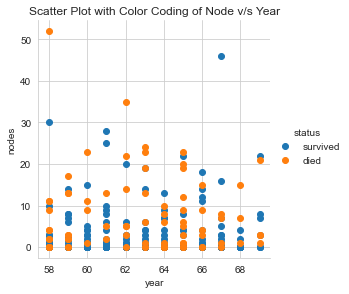

In [16]:
# 2-D Scatter Plot with Color Coding
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", height=4).map(plt.scatter, "year", "nodes") \
            .add_legend().set(title="Scatter Plot with Color Coding of Node v/s Year")
plt.show()

**Observation**

1. Not possible to draw line and seaprate nodes and year

# Pair Plot

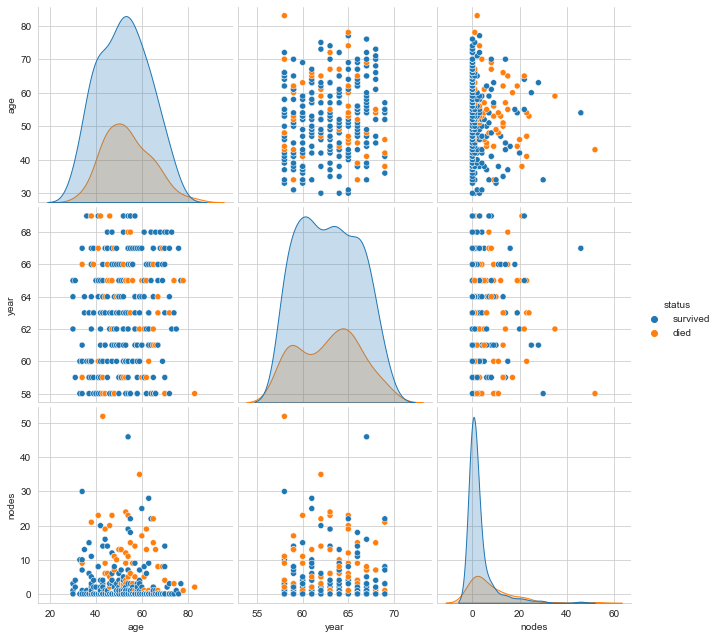

In [17]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", size=3)
plt.show()

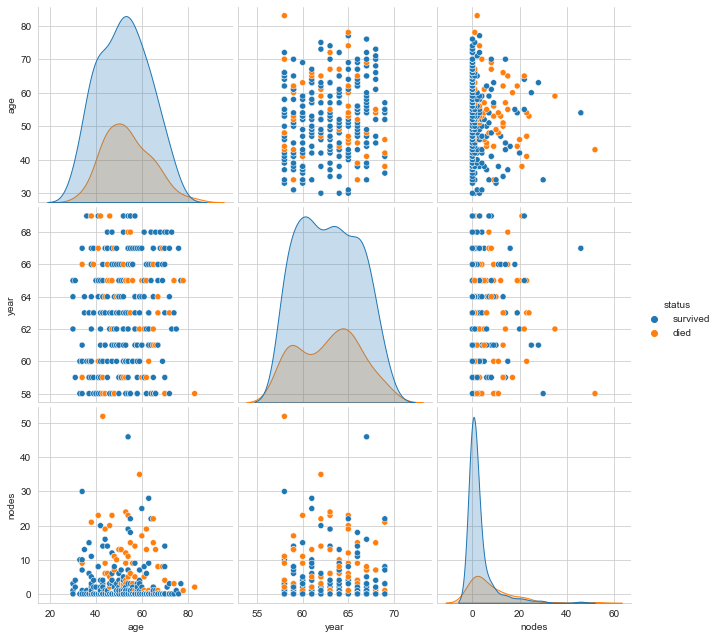

In [18]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", height=3)
plt.show()

**Obseravation**
1. Age and Year are highly overlapped
2. The Degree of overlap is lower in the two classes based on nodes


#  Histogram, PDF, CDF

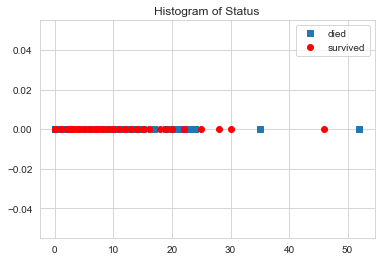

In [19]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of Nodes
import numpy as np
data_survived = data.loc[data["status"] == "survived"];
data_died = data.loc[data["status"] == "died"];


plt.plot(data_died["nodes"], np.zeros_like(data_died['nodes']), 's', label='died')
plt.plot(data_survived["nodes"], np.zeros_like(data_survived['nodes']), 'ro', label='survived')


plt.title("Histogram of Status")
plt.legend()
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

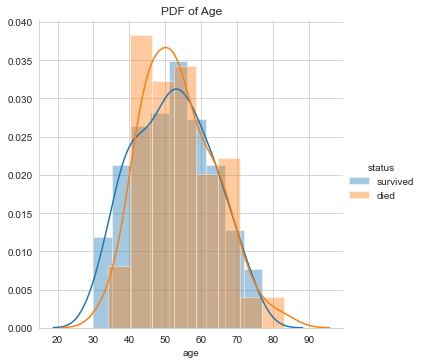

In [20]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "age").add_legend().set(title="PDF of Age")
plt.show()

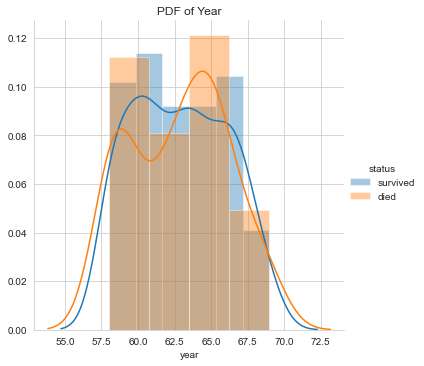

In [21]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year").add_legend().set(title="PDF of Year")
plt.show()

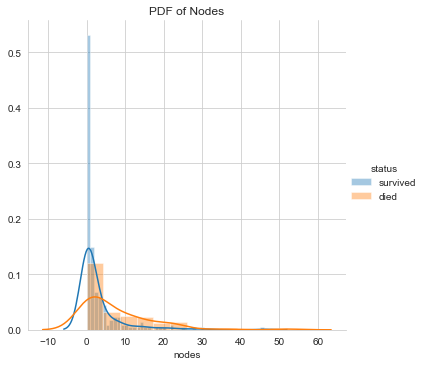

In [22]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "nodes").add_legend().set(title="PDF of Nodes")
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


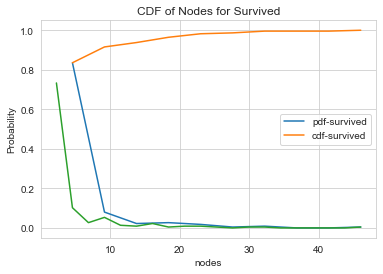

In [23]:
#Plot CDF of nodes for survied

counts, bin_edges = np.histogram(data_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="pdf-survived")
plt.plot(bin_edges[1:], cdf, label="cdf-survived")


counts, bin_edges = np.histogram(data_survived['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("CDF of Nodes for Survived")
plt.xlabel("nodes")
plt.ylabel("Probability")
plt.legend()
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


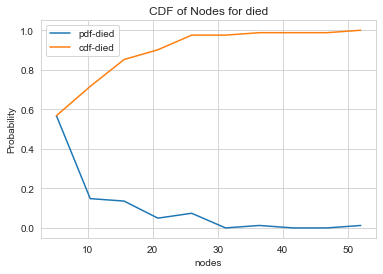

In [24]:
#Plot CDF of nodes for died

counts, bin_edges = np.histogram(data_died['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="pdf-died")
plt.plot(bin_edges[1:], cdf, label="cdf-died")

plt.title("CDF of Nodes for died")
plt.xlabel("nodes")
plt.ylabel("Probability")
plt.legend()
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


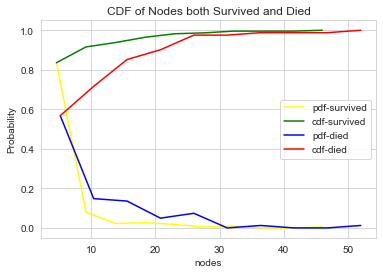

In [25]:
# Plots of CDF of nodes.

# Misclassification error if you use nodes only.

counts, bin_edges = np.histogram(data_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, color='yellow', label='pdf-survived')
plt.plot(bin_edges[1:], cdf, color='green', label='cdf-survived')


# virginica
counts, bin_edges = np.histogram(data_died['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, color='blue', label='pdf-died')
plt.plot(bin_edges[1:], cdf, color='red', label='cdf-died')

plt.title("CDF of Nodes both Survived and Died")
plt.xlabel("nodes")
plt.ylabel("Probability")
plt.legend()
plt.show();

**Observation**
Based of CDF
1. If Number of nodes less than 5 then, 84% it belong to class 1, where as 58% it belogs to class 2

# Mean, Variance and Std-dev

In [26]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(data_survived["nodes"]))
print(np.mean(data_died["nodes"]))

#Mean with an outlier.
print("\nMean with an outlier:")
print(np.mean(np.append(data_survived["nodes"],50)))
print(np.mean(np.append(data_died["nodes"],50)))

#Varience
print("\nVariance")
print(np.var(data_survived["nodes"]))
print(np.var(data_died["nodes"]))

print("\nStd-dev:")
print(np.std(data_survived["nodes"]))
print(np.std(data_died["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Mean with an outlier:
3.0
7.975609756097561

Variance
34.30747654320981
83.3345526596555

Std-dev:
5.857258449412131
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [27]:
print("1. Median: ")
print("suvived",np.median(data_survived["nodes"]))
print("died",np.median(data_died["nodes"]))
print()

print("2. Percentile: ")
print("suvived",np.percentile(data_survived["nodes"], np.arange(0, 100, 25)))
print("died",np.percentile(data_died["nodes"], np.arange(0, 100, 25)))
print()

print("3. Quantile: ")
print("suvived",np.quantile(data_survived["nodes"], [0,1]))
print("died",np.quantile(data_died["nodes"], [0,1]))
print()

# print("4. IQR: ")
# print("suvived",robust.iqr(data_survived["nodes"]))
# print("died",robust.iqr(data_died["nodes"]))
# print()

from statsmodels import robust
print("5. MAD: ")
print("suvived",robust.mad(data_survived["nodes"]))
print("died",robust.mad(data_died["nodes"]))
print()


1. Median: 
suvived 0.0
died 4.0

2. Percentile: 
suvived [0. 0. 0. 3.]
died [ 0.  1.  4. 11.]

3. Quantile: 
suvived [ 0 46]
died [ 0 52]

5. MAD: 
suvived 0.0
died 5.930408874022408



# Box plot and Whiskers

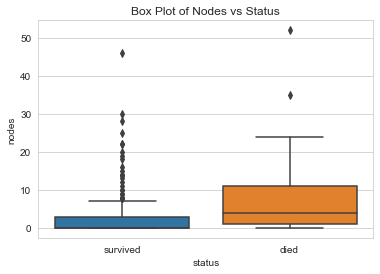

In [28]:
sns.boxplot(x='status',y='nodes', data=data).set(title="Box Plot of Nodes vs Status")
plt.show()

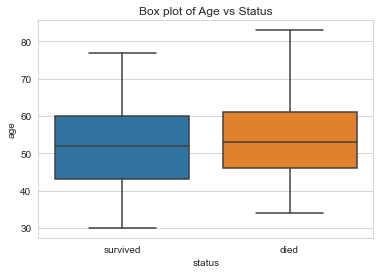

In [29]:
sns.boxplot(x='status',y='age', data=data).set(title="Box plot of Age vs Status")
plt.show()

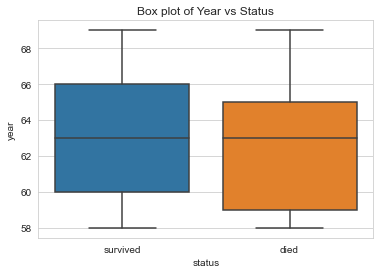

In [30]:
sns.boxplot(x='status',y='year', data=data).set(title="Box plot of Year vs Status")
plt.show()

# Violin plots

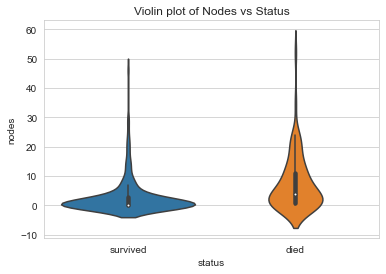

In [31]:
sns.violinplot(x="status", y="nodes", data=data, size=8).set(title="Violin plot of Nodes vs Status")
plt.show()

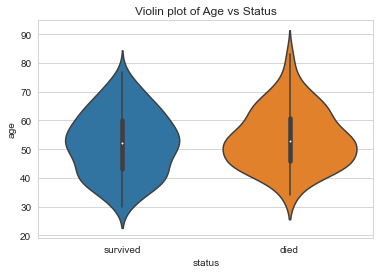

In [32]:
sns.violinplot(x="status", y="age", data=data, size=8).set(title="Violin plot of Age vs Status")
plt.show()

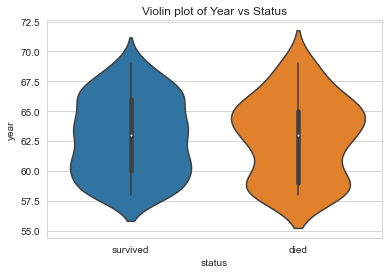

In [33]:
sns.violinplot(x="status", y="year", data=data, size=8).set(title="Violin plot of Year vs Status")
plt.show()

# Multivariate probability density, contour plot.

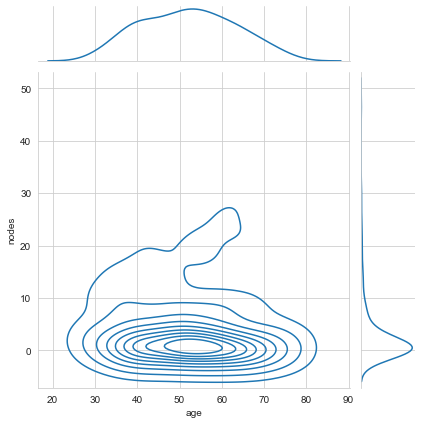

In [34]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=data_survived, kind="kde")
plt.show()

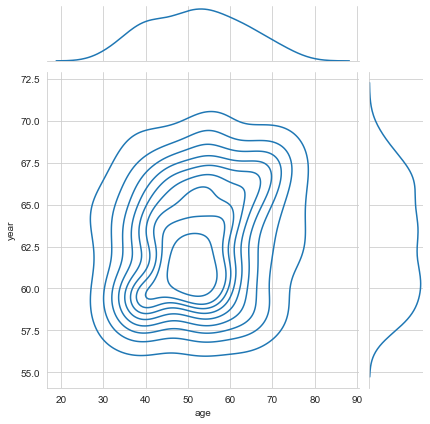

In [35]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year", data=data_survived, kind="kde")
plt.show()

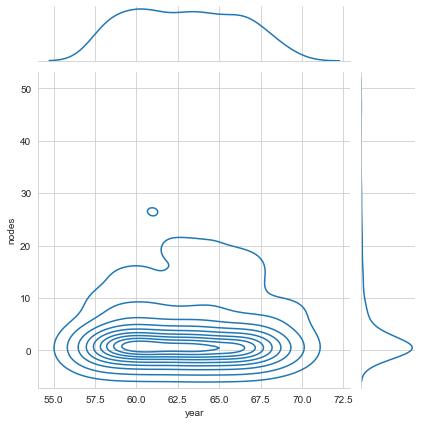

In [36]:
#2D Density plot, contors-plot
sns.jointplot(x="year", y="nodes", data=data_survived, kind="kde")
plt.show()

# Conclusion

1. If Number of nodes less than 5 then, 84% it belong to class 1, where as 58% it belogs to class 2
2. By looking and exploring the data we can say that, the data set is imbalanced
3. Dificult to analyse in 2d or 3d scatter plotting or in Histograms
4. Hard to liik throgh pair plots
5. Seaparating age, year, nodes not possible
6. Even though nodes some how works, but we cannot predict because nodes are overlapped with other two feutures
7. From box and violin plot class 1 i.e., survived class is more dense compare to class to died
6. Although there are some overlapping regions for this feature to segregate the two classes but, the most favoured argument is that for a value of detected axillary nodes less than 3, the chances of patient surviving is more, hence we can keep that as the basis of classification.